## In this notebook, we test our method on 2D space to make sur that all the implemented funtions work correctly

In [1]:
import sys
import os
current = os.path.dirname(os.path.realpath('./'))
sys.path.append(current)
from utils.ld_tools import *

### Simulating 2D sample

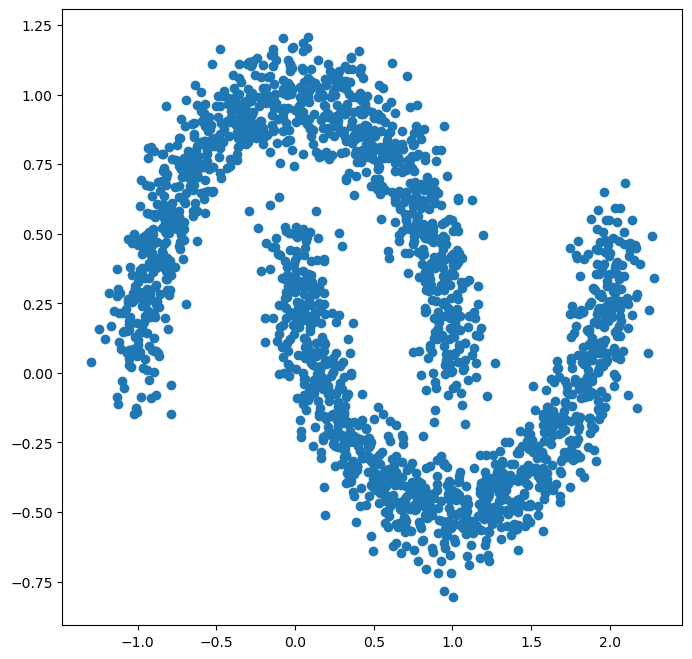

(900, 2)


In [2]:
from sklearn import datasets
points, y = datasets.make_moons(n_samples=2000,noise=0.1)
points0 = points[np.where(y==0)]
points1 = points[np.where(y==1)]
plt.rcParams['figure.figsize'] = [8,8]
plt.scatter(points[:,0],points[:,1])
#plt.grid()
plt.show()

import numpy as np
# define the lower and upper limits for x and y
minX1, maxX1, minX2, maxX2 = np.min(points[:,0])-0.5, np.max(points[:,0])+0.5, np.min(points[:,1])-0.5, np.max(points[:,1])+0.5
# create one-dimensional arrays for x and y
x1 = np.linspace(minX1, maxX1, 30)
x2 = np.linspace(minX2, maxX2, 30)
# create the mesh based on these arrays
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
points_ext = np.zeros((len(X1),2))
points_ext[:,0] = X1
points_ext[:,1] = X2
print(points_ext.shape)

### First, we test the basic function, where each new point is processed separately

In [3]:
list_moon = [points0, points1]
list_lens_depth_ext_fermat = []
for j in range(2):
    dist_mat = distance_matrix(list_moon[j],list_moon[j])
    fermat_dist_mat = fermat_function(dist_mat,alpha=3)
    lens_depth_ext_fermat = []
    for i in range(points_ext.shape[0]):
        dist_array = distance_matrix(list_moon[j],points_ext[i].reshape((1,-1)))
        dist_ext = fermat_function_ext(fermat_dist_mat, dist_array)
        lens_depth_ext_fermat += [lens_depth_ext_function(fermat_dist_mat, dist_ext)]
    list_lens_depth_ext_fermat += [np.array(lens_depth_ext_fermat)]
list_lens_depth_ext_fermat = np.array(list_lens_depth_ext_fermat)
lens_depth_ext_fermat_seperate = np.max(list_lens_depth_ext_fermat, axis=0)

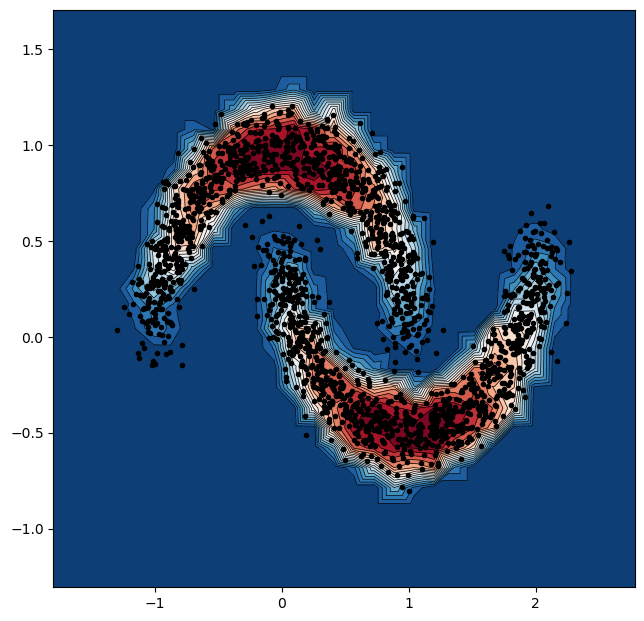

In [4]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_seperate, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_seperate, levels=20, cmap="RdBu_r")
#fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
ax.set(xlim=(np.min(points[:,0])-0.5, np.max(points[:,0])+0.5), ylim=(np.min(points[:,1])-0.5, np.max(points[:,1])+0.5))
plt.show()

### Next, we test the accelerated version, using gpu and tensorial implementation so that that calculations for many new points are performed simultaneously

In [5]:
list_moon = [points0, points1]
list_lens_depth_ext_fermat_sim = []
alpha = 3
for j in range(2):
    dist_mat = distance_matrix(list_moon[j],list_moon[j])
    fermat_dist_mat = fermat_function(dist_mat,alpha=alpha)
    dist_array = distance_matrix(points_ext,list_moon[j])
    dist_ext = fermat_function_ext_simultaneous(fermat_dist_mat, dist_array, alpha=alpha)
    lens_depth_ext_fermat_sim = lens_depth_ext_function_simultaneous(fermat_dist_mat, dist_ext)
    list_lens_depth_ext_fermat_sim += [lens_depth_ext_fermat_sim]
list_lens_depth_ext_fermat_sim = np.array(list_lens_depth_ext_fermat_sim)
lens_depth_ext_fermat_seperate_sim = np.max(list_lens_depth_ext_fermat_sim, axis=0)

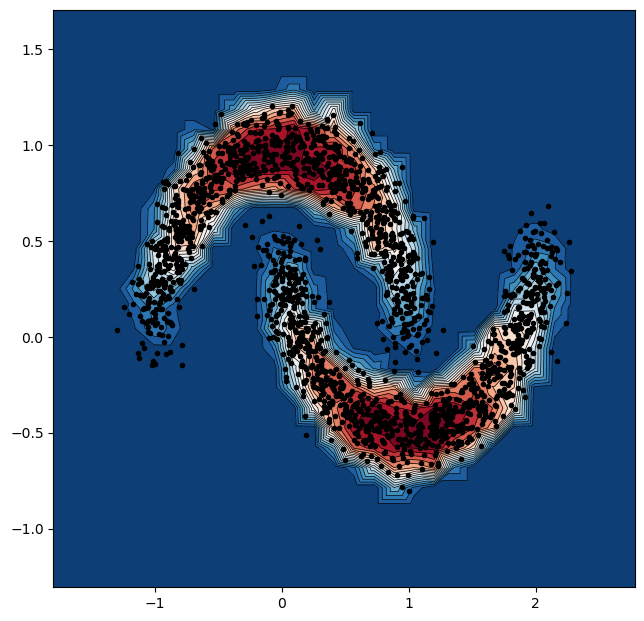

In [6]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax = plt.subplots()
ax.tricontour(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_seperate_sim, levels=20, linewidths=0.5, colors='k')
cntr = ax.tricontourf(points_ext[:,0], points_ext[:,1], lens_depth_ext_fermat_seperate_sim, levels=20, cmap="RdBu_r")
#fig.colorbar(cntr, ax=ax)
#ax.plot(X_grid[:,0], X_grid[:,1], 'ko', ms=1, color="white")
ax.plot(points[:,0], points[:,1], 'ko', ms=3)
ax.set(xlim=(np.min(points[:,0])-0.5, np.max(points[:,0])+0.5), ylim=(np.min(points[:,1])-0.5, np.max(points[:,1])+0.5))
plt.show()